In [2]:
import theano
from theano import tensor as T, function

import numpy as np

In [23]:
X = T.matrix('x')
Y = X ** 2
Z = T.grad(Y.sum(), X)

F = function([X], [Y, Z])

In [24]:
x = np.ones((2, 2)) * 3
y, z = F(x)

print(z)

[[6. 6.]
 [6. 6.]]


In [240]:
%matplotlib inline
np.random.seed(123)

import matplotlib.pyplot as plt

from IPython import display
import time

In [257]:
noise_var = .2
n_samples = 1000

n = np.random.normal(0, noise_var, n_samples)
x = np.arange(n_samples)
x = (x - x.mean()) / x.std()  # Standardise input data
#x /= max(x)                   # Normalise data
w, b = np.random.randn(2)     # Random w and b from normal dist

d = w*x + b  # Correct data
y = d + n    # Noisy observations

Text(0.5,1,'Input-output map')

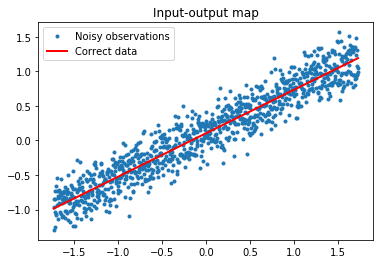

In [258]:
plt.plot(x, y, '.')
plt.plot(x, d, '-r', linewidth=2)
plt.legend(('Noisy observations', 'Correct data'))
plt.title('Input-output map')

In [259]:
X, Y = T.vectors('input', 'desired')
W = theano.shared(.01)
B = theano.shared(0.)
Z = W*X + B
Cost = ((Y-Z)**2).mean()
params = [W, B]  

In [260]:
print(W.get_value())
updates = ((W, W*2), )
double_w = function([], [], updates=updates)

0.01


In [261]:
double_w()
W.get_value()

array(0.02)

In [262]:
#  Cost = (d-y)**2

#  Updates:
#  w = w - lr*grad(cost, w) = w + lr*2*(d-y)*x
#  b = b - lr*grad(cost, b) = b + lr*2*(d-y)

lr = .3
grads = [T.grad(Cost, p) for p in params]
updates = [(p, p - lr*g) for p, g in zip(params, grads)]


In [264]:
train = function([X, Y], Cost, updates=updates)

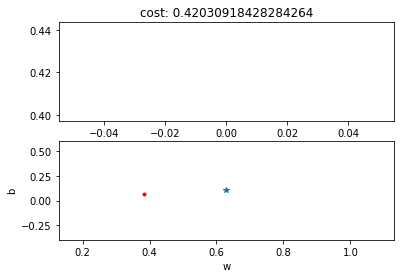

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


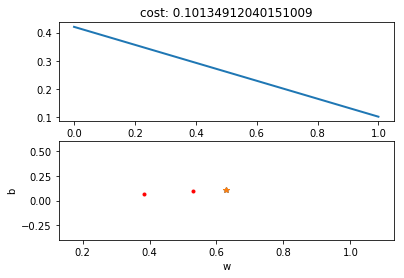

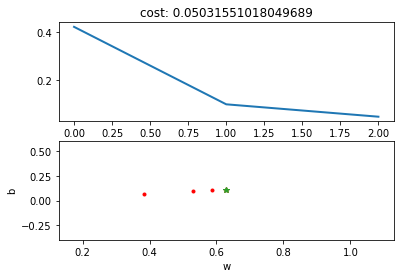

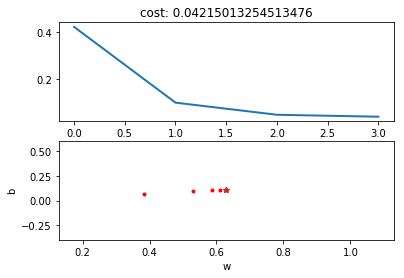

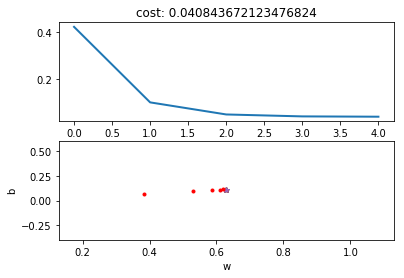

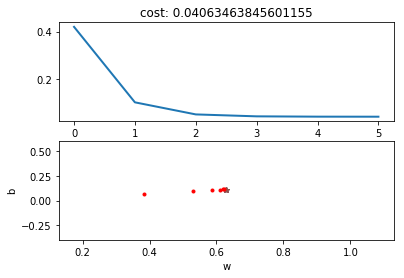

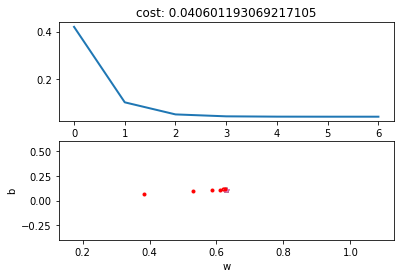

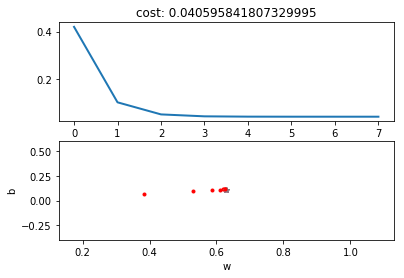

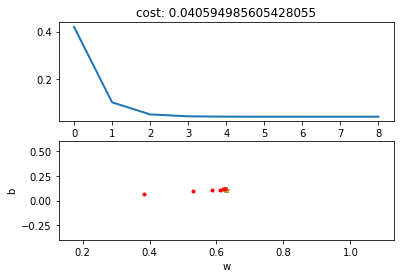

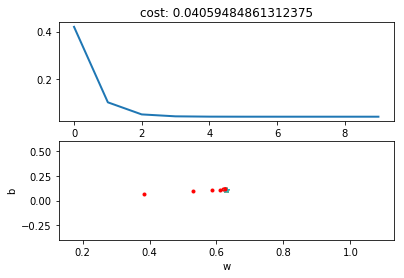

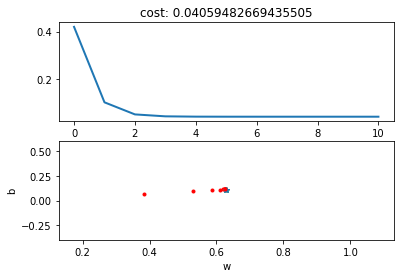

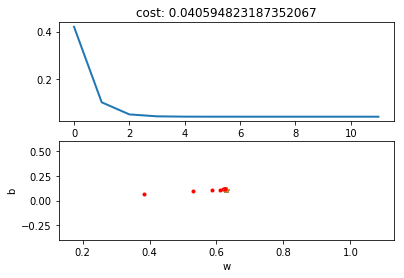

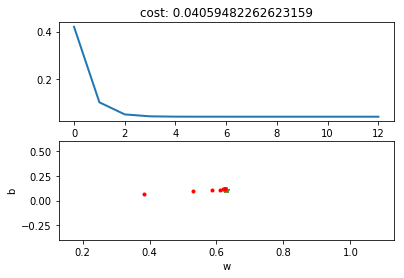

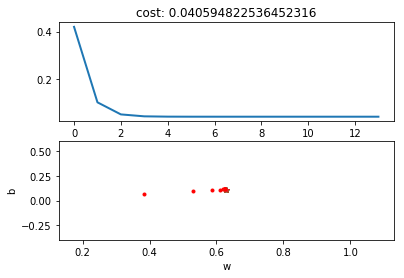

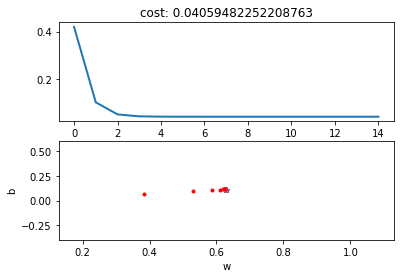

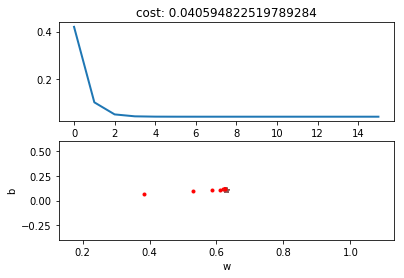

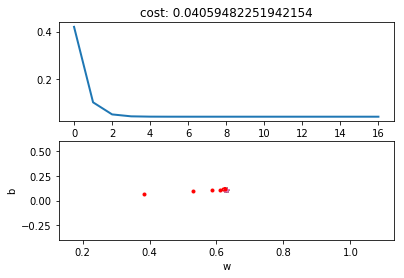

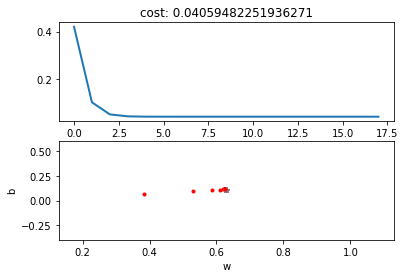

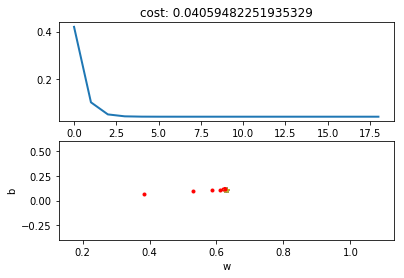

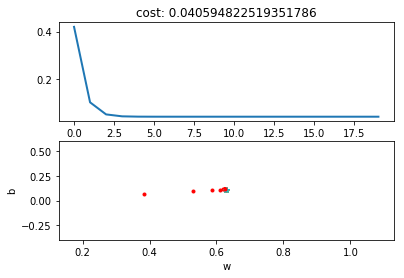

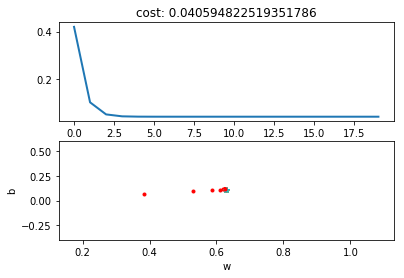

In [265]:
epochs = 20
final_cost = []
for i in range(epochs):
    #for inp, out in zip(x, y):
        final_cost.append(train(x, y))
        
        what, bhat = W.get_value(), B.get_value()
        
        #  Cost function
        plt.subplot(211)
        plt.cla()
        plt.title('cost: {}'.format(final_cost[-1]))
        plt.plot(final_cost, linewidth=2)
        
        #  Parameter space
        plt.subplot(212)
        plt.plot(w, b, '*', linewidth=2)
        plt.plot(what, bhat, '.r', linewidth=2)
        plt.xlim(w-.5, w+.5)
        plt.ylim(b-.5, b+.5)
        plt.xlabel('w')
        plt.ylabel('b')
    
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(3.0)

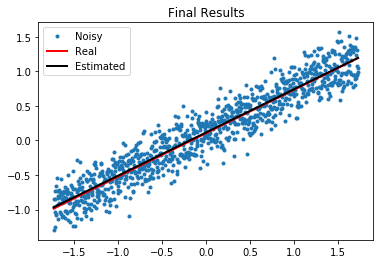

In [266]:
#  Estimated line

plt.title('Final Results')
plt.plot(x, y, '.')
plt.plot(x, d, 'r', linewidth=2)
plt.plot(x, what*x + bhat, 'k', linewidth=2)
plt.legend(('Noisy', 'Real', 'Estimated'))